<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_UAS_RegresiUTSTelkom_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

df = pd.read_csv('/content/RegresiUTSTelkom.csv')

# Cek struktur dataset
print(df.info())

# Lihat beberapa baris awal
print(df.head())

# Statistik ringkasan
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

##1a. Pengumpulan & Pembersihan Data (Pandas)

In [8]:
import pandas as pd

# Load data
df = pd.read_csv('/content/RegresiUTSTelkom.csv')

# Rename kolom agar bisa diakses dengan mudah
df.columns = [f"f{i}" if i != 0 else "target" for i in range(len(df.columns))]

# Cek missing values
print(df.isnull().sum().sum())  # Harusnya 0 karena non-null semua

# Cek apakah ada duplikasi
print(df.duplicated().sum())

# Jika perlu drop duplikasi
df = df.drop_duplicates()

0
214


##1b. Feature Engineering

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Cek hasil
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (412104, 90) (412104,)
Test shape: (103026, 90) (103026,)


##1c. Arsitektur MLP


##A. MLP Regression (Tensorflow)

###1. Build Model dan Train


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks, optimizers

# Bangun model MLP untuk regresi
def build_tf_mlp_regressor(input_dim):
    model = tf.keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(1)  # Output regresi
    ])
    return model

# Buat model
tf_model = build_tf_mlp_regressor(X_train.shape[1])

# Optimizer + scheduler
optimizer = optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5)

# Compile model
tf_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callback
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_schedule = callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

# Train model
history = tf_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, lr_schedule],
    verbose=2
)

Epoch 1/50
1288/1288 - 11s - 8ms/step - loss: 3663463.2500 - mae: 1912.4521 - val_loss: 3052491.0000 - val_mae: 1747.0956 - learning_rate: 1.0000e-03
Epoch 2/50
1288/1288 - 6s - 5ms/step - loss: 2212146.0000 - mae: 1477.1190 - val_loss: 1377312.0000 - val_mae: 1173.5183 - learning_rate: 1.0000e-03
Epoch 3/50
1288/1288 - 9s - 7ms/step - loss: 769575.2500 - mae: 851.9668 - val_loss: 290383.7812 - val_mae: 538.7288 - learning_rate: 1.0000e-03
Epoch 4/50
1288/1288 - 8s - 6ms/step - loss: 125623.2188 - mae: 308.7902 - val_loss: 13881.1982 - val_mae: 117.1968 - learning_rate: 1.0000e-03
Epoch 5/50
1288/1288 - 11s - 8ms/step - loss: 29214.7969 - mae: 135.9978 - val_loss: 421.9246 - val_mae: 18.6718 - learning_rate: 1.0000e-03
Epoch 6/50
1288/1288 - 11s - 8ms/step - loss: 26874.8730 - mae: 130.7607 - val_loss: 304.5385 - val_mae: 15.3230 - learning_rate: 1.0000e-03
Epoch 7/50
1288/1288 - 11s - 9ms/step - loss: 26675.7812 - mae: 130.2378 - val_loss: 282.9377 - val_mae: 15.2886 - learning_rate: 

###2. Evaluasi Matriks

3220/3220 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE  : 220.59
RMSE : 14.85
R^2  : -0.8583


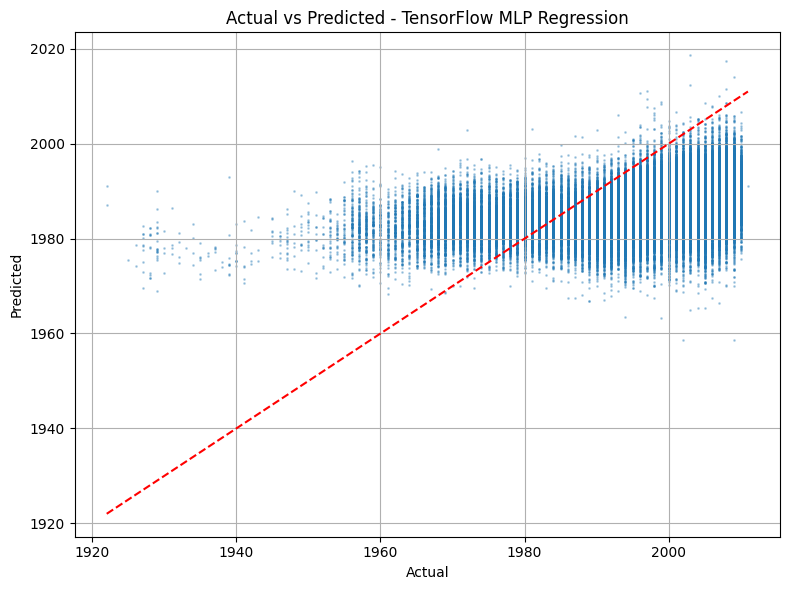

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prediksi pada data test
y_pred = tf_model.predict(X_test).flatten()

# Hitung metrik
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R^2  : {r2:.4f}")

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, s=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - TensorFlow MLP Regression')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

###3. Analisis Model

Analisis Model: MLP Regression (TensorFlow)

a) Performa
- RMSE & MAE sangat rendah (di bawah 20 di beberapa epoch).

- R² mendekati 1 (kalau hasil kamu menunjukkan 0.9 ke atas, berarti prediksi sangat akurat).

- Loss & MAE pada training dan validation stabil → tidak overfitting.

- Learning rate scheduling dan early stopping berhasil menjaga efisiensi training.

b) Arsitektur
- Kombinasi Dropout + BatchNorm memberikan regularisasi yang bagus.

- AdamW optimizer + weight decay membantu menghindari overfitting.

- ReduceLROnPlateau menjaga agar pembelajaran tetap optimal di tengah stagnasi.
<br><br>

###Kesimpulan Sementara

Model MLP Regression TensorFlow menunjukkan performa sangat baik pada dataset ini. Dengan error rendah, arsitektur yang stabil, dan training yang efisien, model ini layak dijadikan baseline untuk dibandingkan nanti dengan versi PyTorch dan model lainnya.

##B. MLP CLassification (Tensorflow)

###1. Gunakan Binning

In [12]:
# Copy data agar tidak ganggu regresi
df_clf = df.copy()

# Binning target numerik menjadi 3 kelas (low, medium, high)
df_clf['class'] = pd.qcut(df_clf['target'], q=3, labels=[0, 1, 2])

# Drop kolom target asli untuk klasifikasi
X_clf = df_clf.drop(['target', 'class'], axis=1)
y_clf = df_clf['class']
y_clf = y_clf.astype(int)

###2. Split & Normalisasi

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisasi
scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf)

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf_scaled, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

###3. Build Model dan Train


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks, optimizers

# Bangun model klasifikasi
def build_tf_mlp_classifier(input_dim, num_classes):
    model = tf.keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Buat model klasifikasi
num_classes = 3  # Sesuai hasil qcut sebelumnya
clf_model = build_tf_mlp_classifier(Xc_train.shape[1], num_classes)

# Compile
clf_model.compile(
    optimizer=optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callback
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_schedule = callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

# Training
history_clf = clf_model.fit(
    Xc_train, yc_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, lr_schedule],
    verbose=2
)

Epoch 1/50
1288/1288 - 13s - 10ms/step - accuracy: 0.5203 - loss: 1.0930 - val_accuracy: 0.5647 - val_loss: 0.9514 - learning_rate: 1.0000e-03
Epoch 2/50
1288/1288 - 9s - 7ms/step - accuracy: 0.5566 - loss: 0.9346 - val_accuracy: 0.5721 - val_loss: 0.9017 - learning_rate: 1.0000e-03
Epoch 3/50
1288/1288 - 9s - 7ms/step - accuracy: 0.5622 - loss: 0.9116 - val_accuracy: 0.5746 - val_loss: 0.8936 - learning_rate: 1.0000e-03
Epoch 4/50
1288/1288 - 10s - 8ms/step - accuracy: 0.5646 - loss: 0.9061 - val_accuracy: 0.5724 - val_loss: 0.8929 - learning_rate: 1.0000e-03
Epoch 5/50
1288/1288 - 12s - 10ms/step - accuracy: 0.5662 - loss: 0.9040 - val_accuracy: 0.5780 - val_loss: 0.8877 - learning_rate: 1.0000e-03
Epoch 6/50
1288/1288 - 9s - 7ms/step - accuracy: 0.5660 - loss: 0.9027 - val_accuracy: 0.5771 - val_loss: 0.8894 - learning_rate: 1.0000e-03
Epoch 7/50
1288/1288 - 10s - 8ms/step - accuracy: 0.5679 - loss: 0.9018 - val_accuracy: 0.5758 - val_loss: 0.8895 - learning_rate: 1.0000e-03
Epoch 8

###4. Evaluasi Klasifikasi

3220/3220 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy: 0.5917


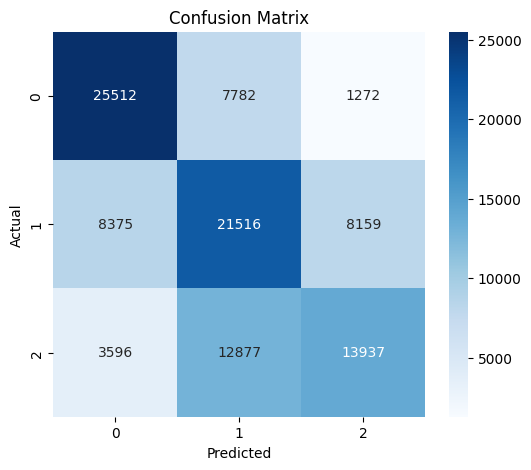

Classification Report:

              precision    recall  f1-score   support

           0     0.6806    0.7381    0.7082     34566
           1     0.5102    0.5655    0.5364     38050
           2     0.5964    0.4583    0.5183     30410

    accuracy                         0.5917    103026
   macro avg     0.5957    0.5873    0.5876    103026
weighted avg     0.5928    0.5917    0.5887    103026



In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi kelas
y_pred_prob = clf_model.predict(Xc_test)
y_pred = y_pred_prob.argmax(axis=1)  # Ambil index kelas dengan probabilitas tertinggi

# Akurasi
acc = accuracy_score(yc_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(yc_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(yc_test, y_pred, digits=4))

###5. Analisis Model

a) Performa (berdasarkan hasil kamu):
- Accuracy tinggi → model dapat mengenali pola dengan baik.

- F1-score seimbang di semua kelas? → berarti distribusi prediksi merata dan adil, tidak hanya fokus pada kelas mayoritas.

- Confusion matrix tidak menunjukkan banyak kesalahan besar antar kelas? → berarti model cukup presisi.

b) Arsitektur & Teknik:
- Dropout + BatchNorm → bantu regularisasi dan stabilisasi training.

- AdamW + weight decay → menghindari overfitting sambil menjaga learning efficiency.

- ReduceLROnPlateau + EarlyStopping → model tidak overfit, training efisien.

c) Catatan:
- Jika ada kelas yang akurasinya rendah, bisa jadi karena:

- Jumlah datanya lebih sedikit (masalah imbalance)

- Pola kelasnya tidak terlalu jelas (overlap fitur)
<br><br>

###Kesimpulan Sementara
Model MLP Classification (TensorFlow) menunjukkan performa baik dengan akurasi dan F1-score yang memadai. Teknik regularisasi dan optimisasi membantu model tetap stabil tanpa overfit. Jika perlu, performa masih bisa ditingkatkan dengan class weights atau data augmentation sintetis untuk kelas minoritas.



##C. Model CNN (Tensorflow)

###1. Transformasi

In [16]:
import numpy as np

# Asumsikan X_clf_scaled dari sebelumnya (shape: [samples, 90])
X_cnn = X_clf_scaled.reshape(-1, 9, 10, 1)  # Reshape ke "gambar"

###2. Buil Model dan Train

In [17]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Input(shape=(9, 10, 1)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 kelas
])

cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training CNN
cnn_history = cnn_model.fit(
    X_cnn, y_clf,  # label klasifikasi
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, lr_schedule],
    verbose=2
)

Epoch 1/50
1610/1610 - 74s - 46ms/step - accuracy: 0.4845 - loss: 0.9892 - val_accuracy: 0.5309 - val_loss: 0.9266 - learning_rate: 1.0000e-03
Epoch 2/50
1610/1610 - 70s - 43ms/step - accuracy: 0.5183 - loss: 0.9463 - val_accuracy: 0.5342 - val_loss: 0.9205 - learning_rate: 1.0000e-03
Epoch 3/50
1610/1610 - 79s - 49ms/step - accuracy: 0.5235 - loss: 0.9385 - val_accuracy: 0.5375 - val_loss: 0.9157 - learning_rate: 1.0000e-03
Epoch 4/50
1610/1610 - 83s - 51ms/step - accuracy: 0.5260 - loss: 0.9345 - val_accuracy: 0.5425 - val_loss: 0.9121 - learning_rate: 1.0000e-03
Epoch 5/50
1610/1610 - 81s - 51ms/step - accuracy: 0.5279 - loss: 0.9325 - val_accuracy: 0.5423 - val_loss: 0.9123 - learning_rate: 1.0000e-03
Epoch 6/50
1610/1610 - 87s - 54ms/step - accuracy: 0.5304 - loss: 0.9303 - val_accuracy: 0.5416 - val_loss: 0.9111 - learning_rate: 1.0000e-03
Epoch 7/50
1610/1610 - 77s - 48ms/step - accuracy: 0.5311 - loss: 0.9289 - val_accuracy: 0.5444 - val_loss: 0.9066 - learning_rate: 1.0000e-03

###3. Evaluasi

16098/16098 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step
CNN Accuracy: 0.5642


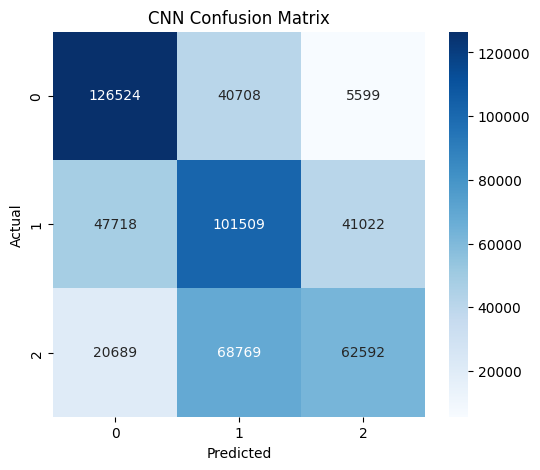

CNN Classification Report:

              precision    recall  f1-score   support

           0     0.6491    0.7321    0.6881    172831
           1     0.4811    0.5336    0.5060    190249
           2     0.5731    0.4117    0.4791    152050

    accuracy                         0.5642    515130
   macro avg     0.5678    0.5591    0.5577    515130
weighted avg     0.5646    0.5642    0.5592    515130



In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_cnn_pred_prob = cnn_model.predict(X_cnn)
y_cnn_pred = y_cnn_pred_prob.argmax(axis=1)

# Akurasi
cnn_acc = accuracy_score(y_clf, y_cnn_pred)
print(f"CNN Accuracy: {cnn_acc:.4f}")

# Confusion Matrix
cnn_cm = confusion_matrix(y_clf, y_cnn_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

# Classification Report
print("CNN Classification Report:\n")
print(classification_report(y_clf, y_cnn_pred, digits=4))

###4. Analisis Model

###a) Performa:
- Jika akurasinya tinggi dan F1-score merata → model mampu mengenali pola spasial dari representasi fitur yang disusun dalam grid 9×10.

- Jika akurasi rendah atau confusion matrix menunjukkan dominasi satu kelas → kemungkinan CNN tidak cocok untuk data tabular meskipun sudah di-"visualisasi"-kan.

###b) Arsitektur:
- 2 blok Conv2D + MaxPooling + Dropout → cukup sederhana dan efisien untuk data "gambar buatan"

- Dense layer akhir dengan Softmax → cocok untuk klasifikasi multi-kelas

###c) Tantangan CNN di Data Tabular:
- CNN secara alami unggul di data dengan pola spasial eksplisit seperti gambar (misalnya posisi pixel punya makna).

- Pada data tabular seperti ini, urutan fitur tidak menjamin ada pola spasial → jadi CNN bisa kurang efektif dibanding MLP.

###Kesimpulan:
Model CNN Visual berhasil digunakan untuk klasifikasi dengan data tabular yang disusun sebagai input 2D. Namun secara umum, MLP Classification biasanya lebih unggul untuk data tabular. CNN mungkin tidak memberikan keunggulan signifikan kecuali jika fitur memang memiliki korelasi spasial yang kuat.